# Data Loading & Preparation

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from prophet import Prophet

In [2]:
df = pd.read_csv("Ac_search.csv")

In [3]:
df.head(5)

,date,search
0,02/08/2020,33
1,09/08/2020,30
2,16/08/2020,26
3,23/08/2020,20
4,30/08/2020,22


In [4]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    262 non-null    object
 1   search  262 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [5]:
df["date"] = pd.to_datetime(df["date"],dayfirst=True)
df["search"] = df["search"].astype(int)
df.dtypes

date      datetime64[ns]
search             int32
dtype: object

In [6]:
df.set_index ("date",inplace=True)

In [7]:
df.describe()

,search
count,262.000000
mean,24.167939
std,18.989068
min,5.000000
25%,10.000000
50%,16.500000
75%,32.000000
max,100.000000


# Data Visualization

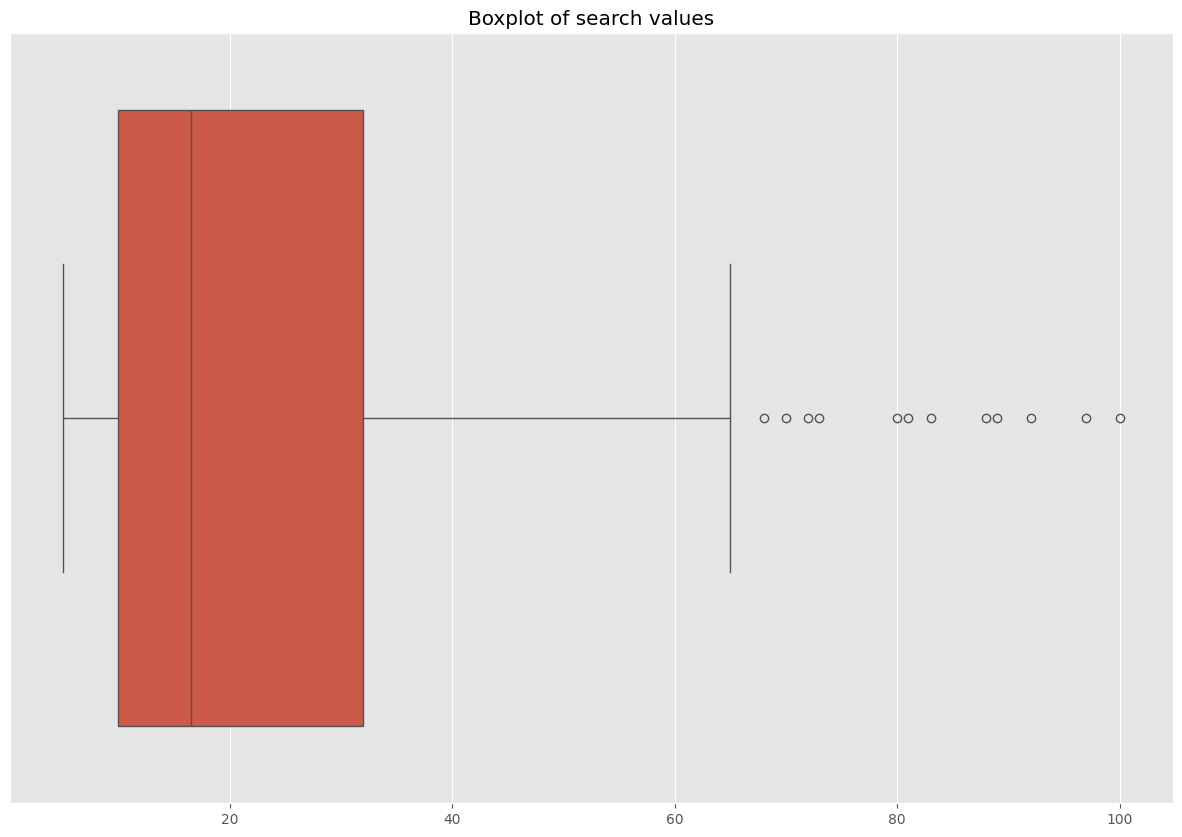

In [8]:
plt.figure (figsize=(15,10))
sns.boxplot (data=df , orient="h")
plt.title ("Boxplot of search values")
plt.yticks([])
plt.show()

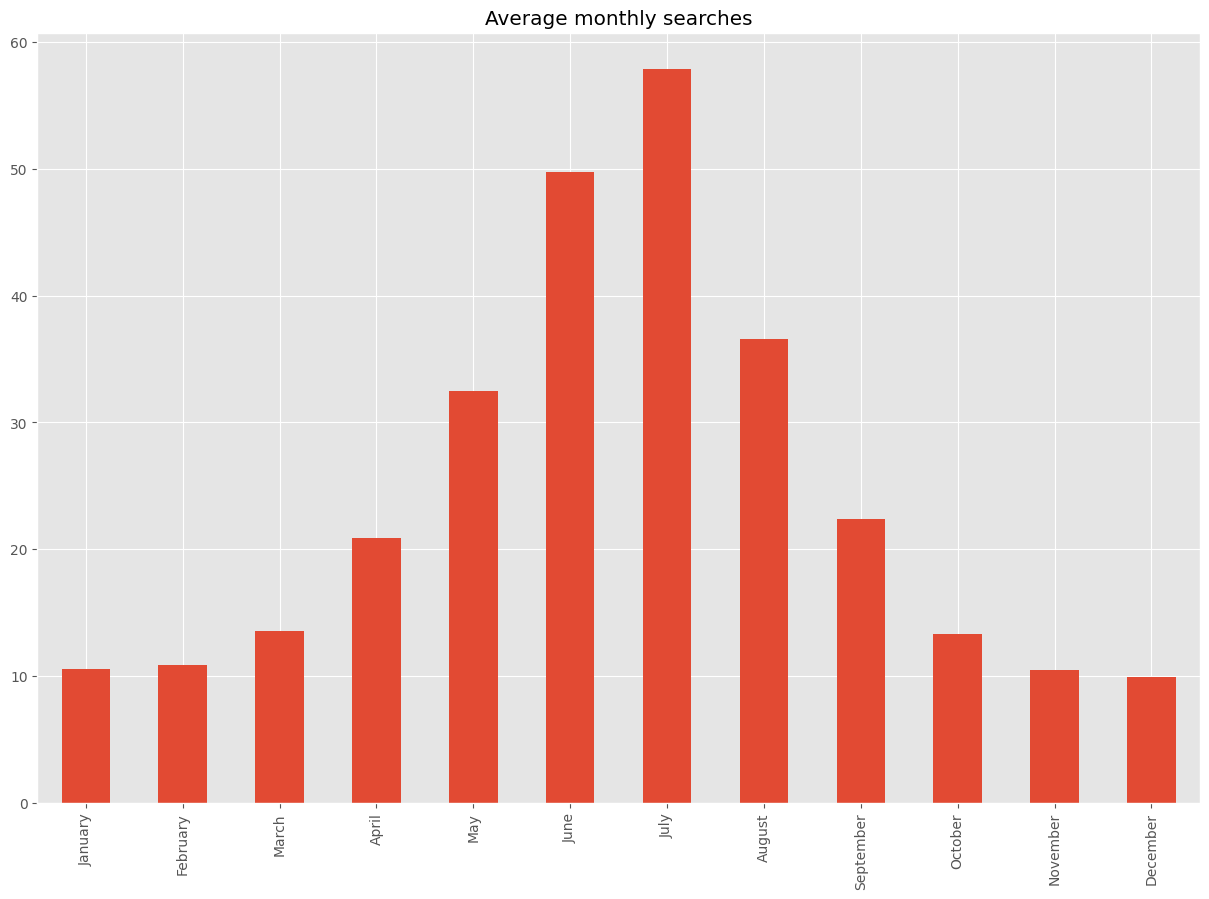

In [9]:
import calendar
monthly_avg = df.groupby(df.index.month)["search"].mean()
monthly_avg.index = monthly_avg.index.map(lambda x: calendar.month_name[x])
monthly_avg.plot(figsize=(15,10),kind='bar', title='Average monthly searches')
plt.xlabel ("")
plt.show()

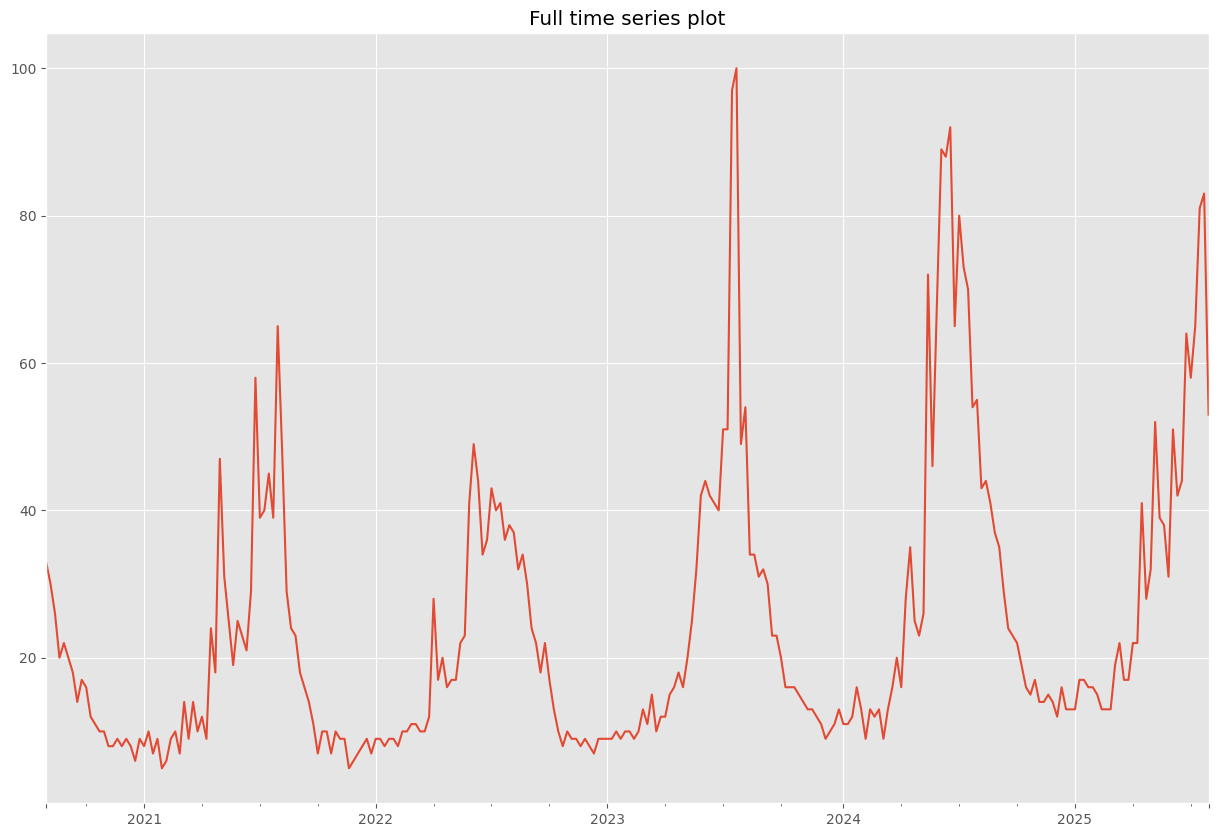

In [10]:
df.plot(figsize=(15,10),title="Full time series plot",legend=False)
plt.xlabel ("")
plt.show()

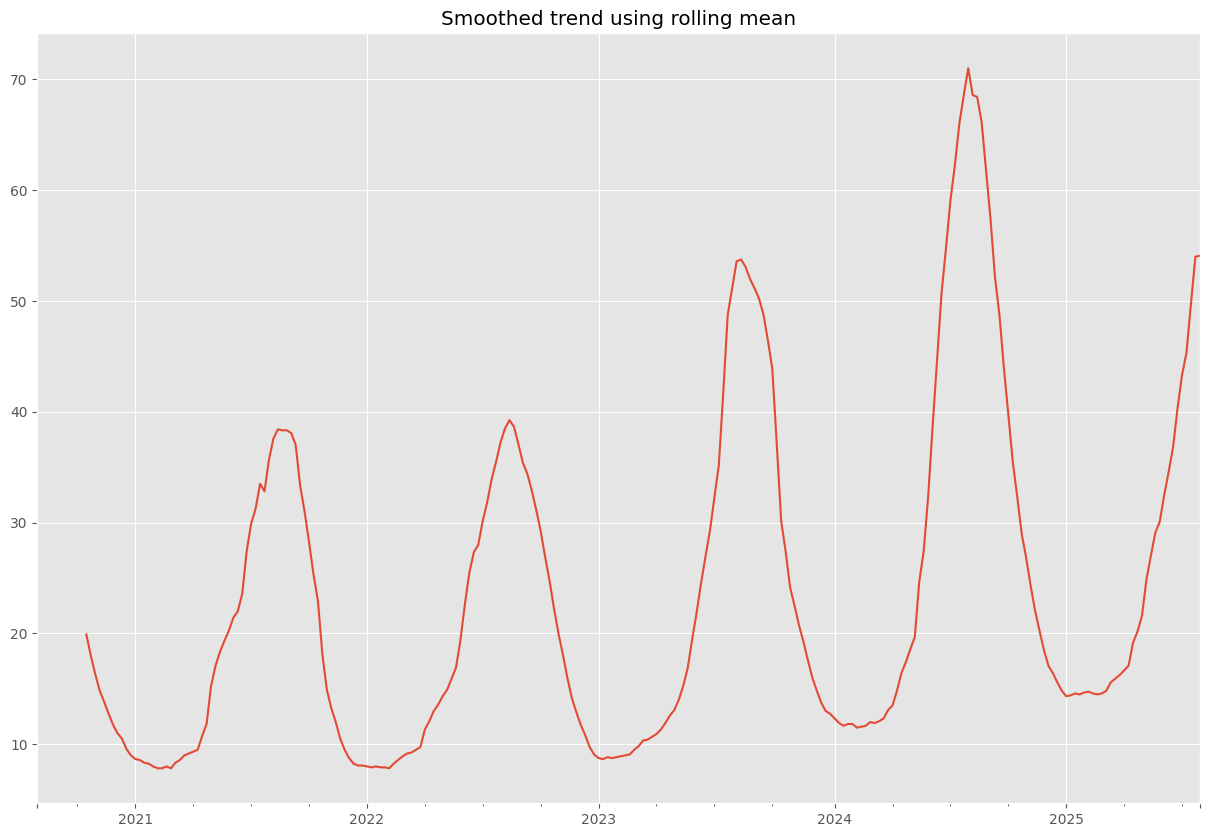

In [11]:
df.rolling(12).mean().plot(figsize=(15,10),title="Smoothed trend using rolling mean",legend=False)
plt.xlabel ("")
plt.show()

# Time Series Forecasting

In [12]:
df.reset_index (inplace=True)
df.columns = ["ds","y"]
# For ignore Message Only !
import logging
logging.getLogger('cmdstanpy').disabled = True
# Build Model
model = Prophet(yearly_seasonality=True)
model.fit(df)

# Start Predict for 2 Years (24 M)
future = model.make_future_dataframe(periods=24, freq='ME')
last_date = df['ds'].max()

forecast = model.predict(future)

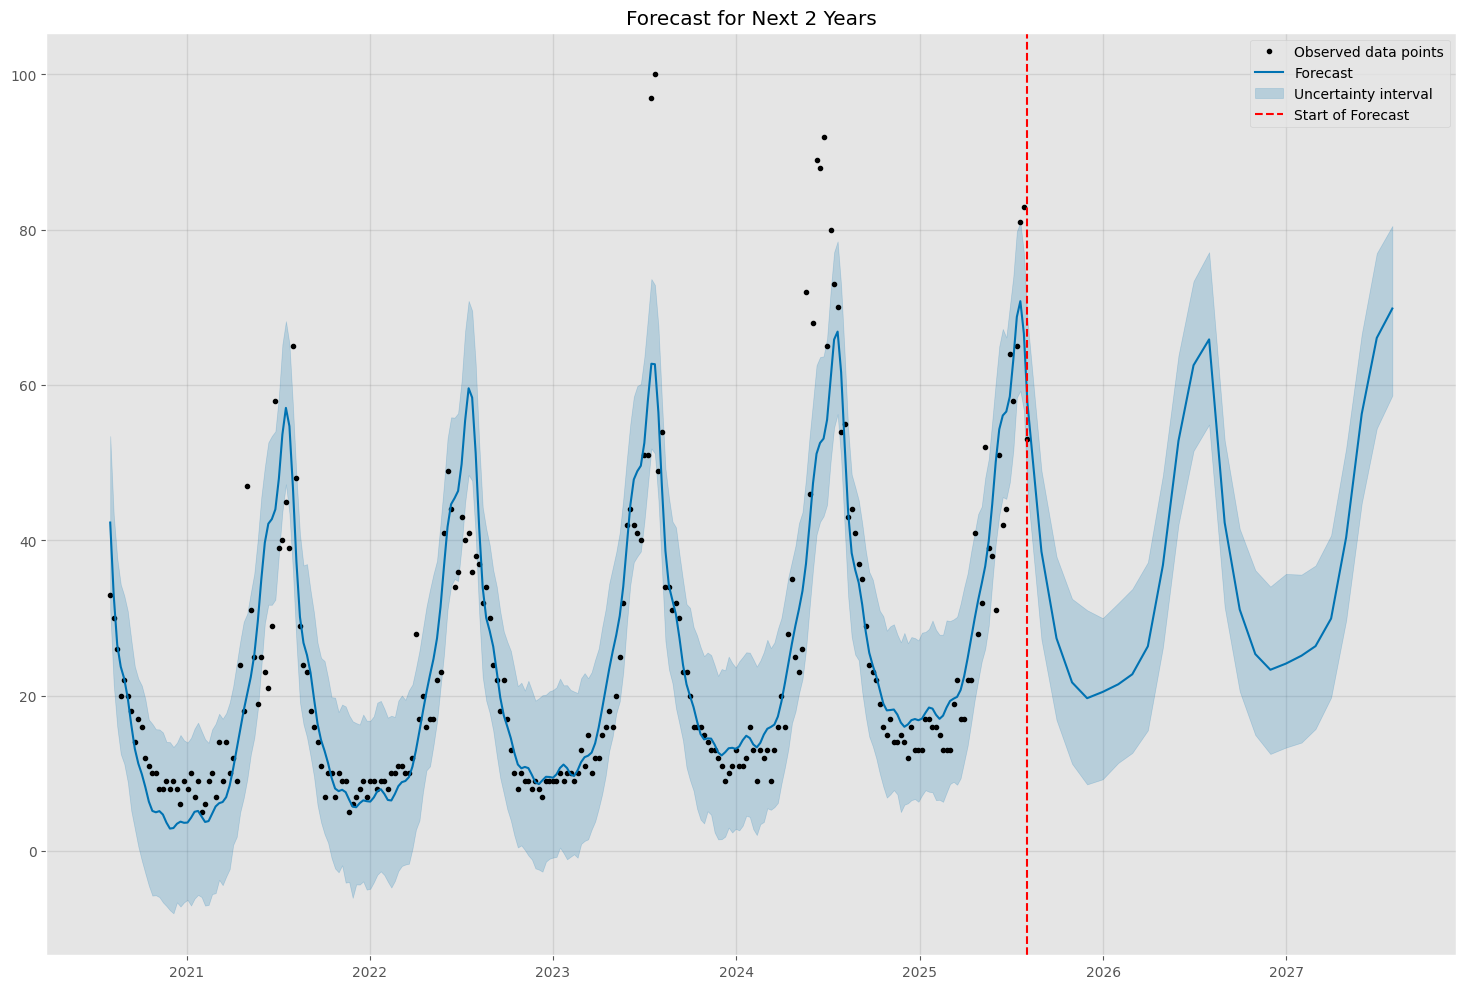

In [13]:
fig = model.plot(forecast, figsize=(15,10))
ax = fig.gca()
plt.axvline(x=last_date, color='red', linestyle='--', label='Start of Forecast')
plt.title("Forecast for Next 2 Years")
plt.legend ()
plt.xlabel ("")
plt.ylabel("")
plt.show()